<a href="https://colab.research.google.com/github/ahcamachod/1819-clustering-extrayendo-patrones-de-datos/blob/main/clustering_aula_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Clustering: Extrayendo patrones de datos
En este notebook estaremos analizando patrones en el comportamiento de clientes de tarjeta de crédito empleando un dataset de Kaggle llamado CC GENERAL.csv.

Dicho análisis estará sujeto a los resultados obtenidos a través de una técnica de aprendizaje no supervisada llamada clustering.

Dataset: https://www.kaggle.com/arjunbhasin2013/ccdata

# 1. Bibliotecas utilizadas
Las versiones de las bibliotecas que usaremos son las siguientes:




In [1]:
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn

print(f'matplotlib --> {matplotlib.__version__}')
print(f'pandas --> {pd.__version__}')
print(f'numpy --> {np.__version__}')
print(f'seaborn --> {sns.__version__}')
print(f'sklearn --> {sklearn.__version__}')

matplotlib --> 3.9.2
pandas --> 2.2.2
numpy --> 2.0.1
seaborn --> 0.13.2
sklearn --> 1.5.2


In [5]:
URL ='C:\\Users\\USUARIO\\Documents\\BASE DE DATOS\\CC GENERAL.csv'
dataset=pd.read_csv(URL)
dataset

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     C10001    40.900749           0.818182      95.40              0.00   
1     C10002  3202.467416           0.909091       0.00              0.00   
2     C10003  2495.148862           1.000000     773.17            773.17   
3     C10004  1666.670542           0.636364    1499.00           1499.00   
4     C10005   817.714335           1.000000      16.00             16.00   
...      ...          ...                ...        ...               ...   
8945  C19186    28.493517           1.000000     291.12              0.00   
8946  C19187    19.183215           1.000000     300.00              0.00   
8947  C19188    23.398673           0.833333     144.40              0.00   
8948  C19189    13.457564           0.833333       0.00              0.00   
8949  C19190   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.083333                 1              1        7500.0   
4                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
8945                0.000000                 0              6        1000.0   
8946                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0      201.802084        139.509787          0.000000      12  
1     4103.032597       1072.340217          0.222222      12  
2      622.066742        627.284787          0.000000      12  
3        0.000000               NaN          0.000000      12  
4      678.334763        244.791237          0.000000      12  
...           ...               ...               ...     ...  
8945   325.594462         48.886365  

# 2. Obteniendo los *clusters* y entendiendo criterios y métricas de validación

In [6]:
dataset

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     C10001    40.900749           0.818182      95.40              0.00   
1     C10002  3202.467416           0.909091       0.00              0.00   
2     C10003  2495.148862           1.000000     773.17            773.17   
3     C10004  1666.670542           0.636364    1499.00           1499.00   
4     C10005   817.714335           1.000000      16.00             16.00   
...      ...          ...                ...        ...               ...   
8945  C19186    28.493517           1.000000     291.12              0.00   
8946  C19187    19.183215           1.000000     300.00              0.00   
8947  C19188    23.398673           0.833333     144.40              0.00   
8948  C19189    13.457564           0.833333       0.00              0.00   
8949  C19190   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.083333                 1              1        7500.0   
4                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
8945                0.000000                 0              6        1000.0   
8946                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0      201.802084        139.509787          0.000000      12  
1     4103.032597       1072.340217          0.222222      12  
2      622.066742        627.284787          0.000000      12  
3        0.000000               NaN          0.000000      12  
4      678.334763        244.791237          0.000000      12  
...           ...               ...               ...     ...  
8945   325.594462         48.886365  

In [ ]:
dataset.drop(columns=['CUST_ID','TENURE'],inplace=True)

In [8]:
dataset

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0       40.900749           0.818182      95.40              0.00   
1     3202.467416           0.909091       0.00              0.00   
2     2495.148862           1.000000     773.17            773.17   
3     1666.670542           0.636364    1499.00           1499.00   
4      817.714335           1.000000      16.00             16.00   
...           ...                ...        ...               ...   
8945    28.493517           1.000000     291.12              0.00   
8946    19.183215           1.000000     300.00              0.00   
8947    23.398673           0.833333     144.40              0.00   
8948    13.457564           0.833333       0.00              0.00   
8949   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.083333                 1              1        7500.0   
4                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
8945                0.000000                 0              6        1000.0   
8946                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  
0      201.802084        139.509787          0.000000  
1     4103.032597       1072.340217          0.222222  
2      622.066742        627.284787          0.000000  
3        0.000000               NaN          0.000000  
4      678.334763        244.791237          0.000000  
...           ...               ...               ...  
8945   325.594462         48.886365          0.500000  
8946   275.861322               NaN          0.000000  
8947    81.270775         82.418369          0.250000  
8948    52.549959         

In [11]:
missing = dataset.isna().sum()
missing

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
dtype: int64

In [12]:
dataset.fillna(dataset.median(), inplace=True)

In [13]:
missing = dataset.isna().sum()
missing

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
dtype: int64

In [14]:
from sklearn.preprocessing import Normalizer
values=Normalizer().fit_transform(dataset.values)
values

array([[3.93555441e-02, 7.87271593e-04, 9.17958473e-02, ...,
        1.94178127e-01, 1.34239194e-01, 0.00000000e+00],
       [2.93875903e-01, 8.34231560e-05, 0.00000000e+00, ...,
        3.76516684e-01, 9.84037959e-02, 2.03923046e-05],
       [3.10798149e-01, 1.24560965e-04, 9.63068011e-02, ...,
        7.74852335e-02, 7.81351982e-02, 0.00000000e+00],
       ...,
       [2.27733092e-02, 8.11060955e-04, 1.40540698e-01, ...,
        7.90986945e-02, 8.02156174e-02, 2.43318384e-04],
       [2.65257948e-02, 1.64255731e-03, 0.00000000e+00, ...,
        1.03579625e-01, 1.09898221e-01, 4.92767391e-04],
       [1.86406219e-01, 3.33426837e-04, 5.46778061e-01, ...,
        3.15915455e-02, 4.41568390e-02, 0.00000000e+00]])

In [15]:
from sklearn.cluster import KMeans
k_means =KMeans(n_clusters=5,n_init=10,max_iter=300)
y_pred=k_means.fit_predict(values)

**2.1 Calculando el coeficiente de Silhoutte**

In [18]:
from sklearn import metrics
labels =k_means.labels_
silhouette=metrics.silhouette_score(values, labels, metric='euclidean')
print(silhouette)

0.36457606314711744


# 3. Entendiendo y calculando el índice Davies-Bouldin

In [20]:
dbs=metrics.davies_bouldin_score(values,labels)
print(dbs)

1.0749530537541765


# 4. Entendiendo y calculando el índice Calinski-Harabasz

In [21]:
calinski=metrics.calinski_harabasz_score(values,labels)
print(calinski)

3431.5800207486095


# 5. Validando y visualizando los *clusters*

In [23]:
scores=[]
for s in range(3,11):
    score={}
    k_means =KMeans(n_clusters=s,n_init=10,max_iter=300)
    y_pred=k_means.fit_predict(values)
    labels =k_means.labels_
    score['N_clusters']=s
    score['silhouette']=metrics.silhouette_score(values, labels, metric='euclidean')
    score['Davies-Bouldin']=metrics.davies_bouldin_score(values,labels)
    score['Calinski-Harabasz']=metrics.calinski_harabasz_score(values,labels)
    scores.append(score)
table =pd.DataFrame(scores)
table

N_clusters  silhouette  Davies-Bouldin  Calinski-Harabasz
0           3    0.327220        1.309607        3526.440520
1           4    0.348257        1.221290        3528.717622
2           5    0.348636        1.152657        3422.843134
3           6    0.364854        1.045346        3523.516921
4           7    0.327771        1.150873        3398.384619
5           8    0.309022        1.174235        3239.100765
6           9    0.353856        1.125617        3106.447170
7          10    0.351096        1.118185        3019.153665

In [24]:
import numpy as np
random_data=np.random.rand(8950,16)

scores=[]

for s in range(3,11):
    score={}
    k_means =KMeans(n_clusters=s,n_init=10,max_iter=300)
    y_pred=k_means.fit_predict(random_data)
    labels =k_means.labels_
    score['N_clusters']=s
    score['silhouette']=metrics.silhouette_score(random_data, labels, metric='euclidean')
    score['Davies-Bouldin']=metrics.davies_bouldin_score(random_data,labels)
    score['Calinski-Harabasz']=metrics.calinski_harabasz_score(random_data,labels)
    scores.append(score)
random_table =pd.DataFrame(scores)
random_table

N_clusters  silhouette  Davies-Bouldin  Calinski-Harabasz
0           3    0.040448        3.951307         376.171750
1           4    0.041781        3.727052         335.153837
2           5    0.039538        3.512865         302.412021
3           6    0.039198        3.347490         278.574453
4           7    0.039536        3.213110         260.324344
5           8    0.039962        3.085227         247.276447
6           9    0.040404        2.989637         233.812080
7          10    0.040537        2.919877         222.423109

In [25]:
set1,set2,set3 =np.array_split(values,3)
sets =[set1,set2,set3]
scores=[]

for set_ in sets:
    score={}
    n=1
    k_means =KMeans(n_clusters=6,n_init=10,max_iter=300)
    y_pred=k_means.fit_predict(set_)
    labels =k_means.labels_
    score['Set']=f'set{n}'
    n +=1
    score['silhouette']=metrics.silhouette_score(set_, labels, metric='euclidean')
    score['Davies-Bouldin']=metrics.davies_bouldin_score(set_,labels)
    scores.append(score)
estability_table =pd.DataFrame(scores)
estability_table

Set  silhouette  Davies-Bouldin
0  set1    0.364197        1.023237
1  set1    0.365111        1.059548
2  set1    0.372671        1.039948

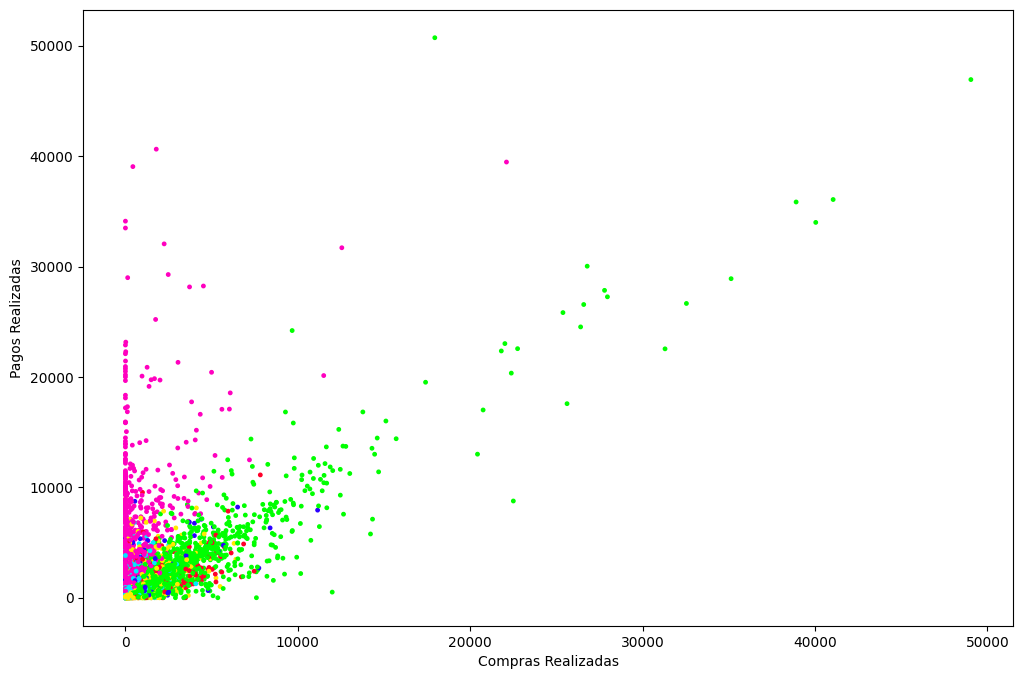

In [29]:
k_means =KMeans(n_clusters=6,n_init=10,max_iter=300)
y_pred=k_means.fit_predict(values)
labels =k_means.labels_
dataset['CLUSTER']=labels
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.scatter(dataset['PURCHASES'],dataset['PAYMENTS'], c=labels, s=6, cmap='gist_rainbow')
plt.xlabel('Compras Realizadas')
plt.ylabel('Pagos Realizadas')
plt.show()

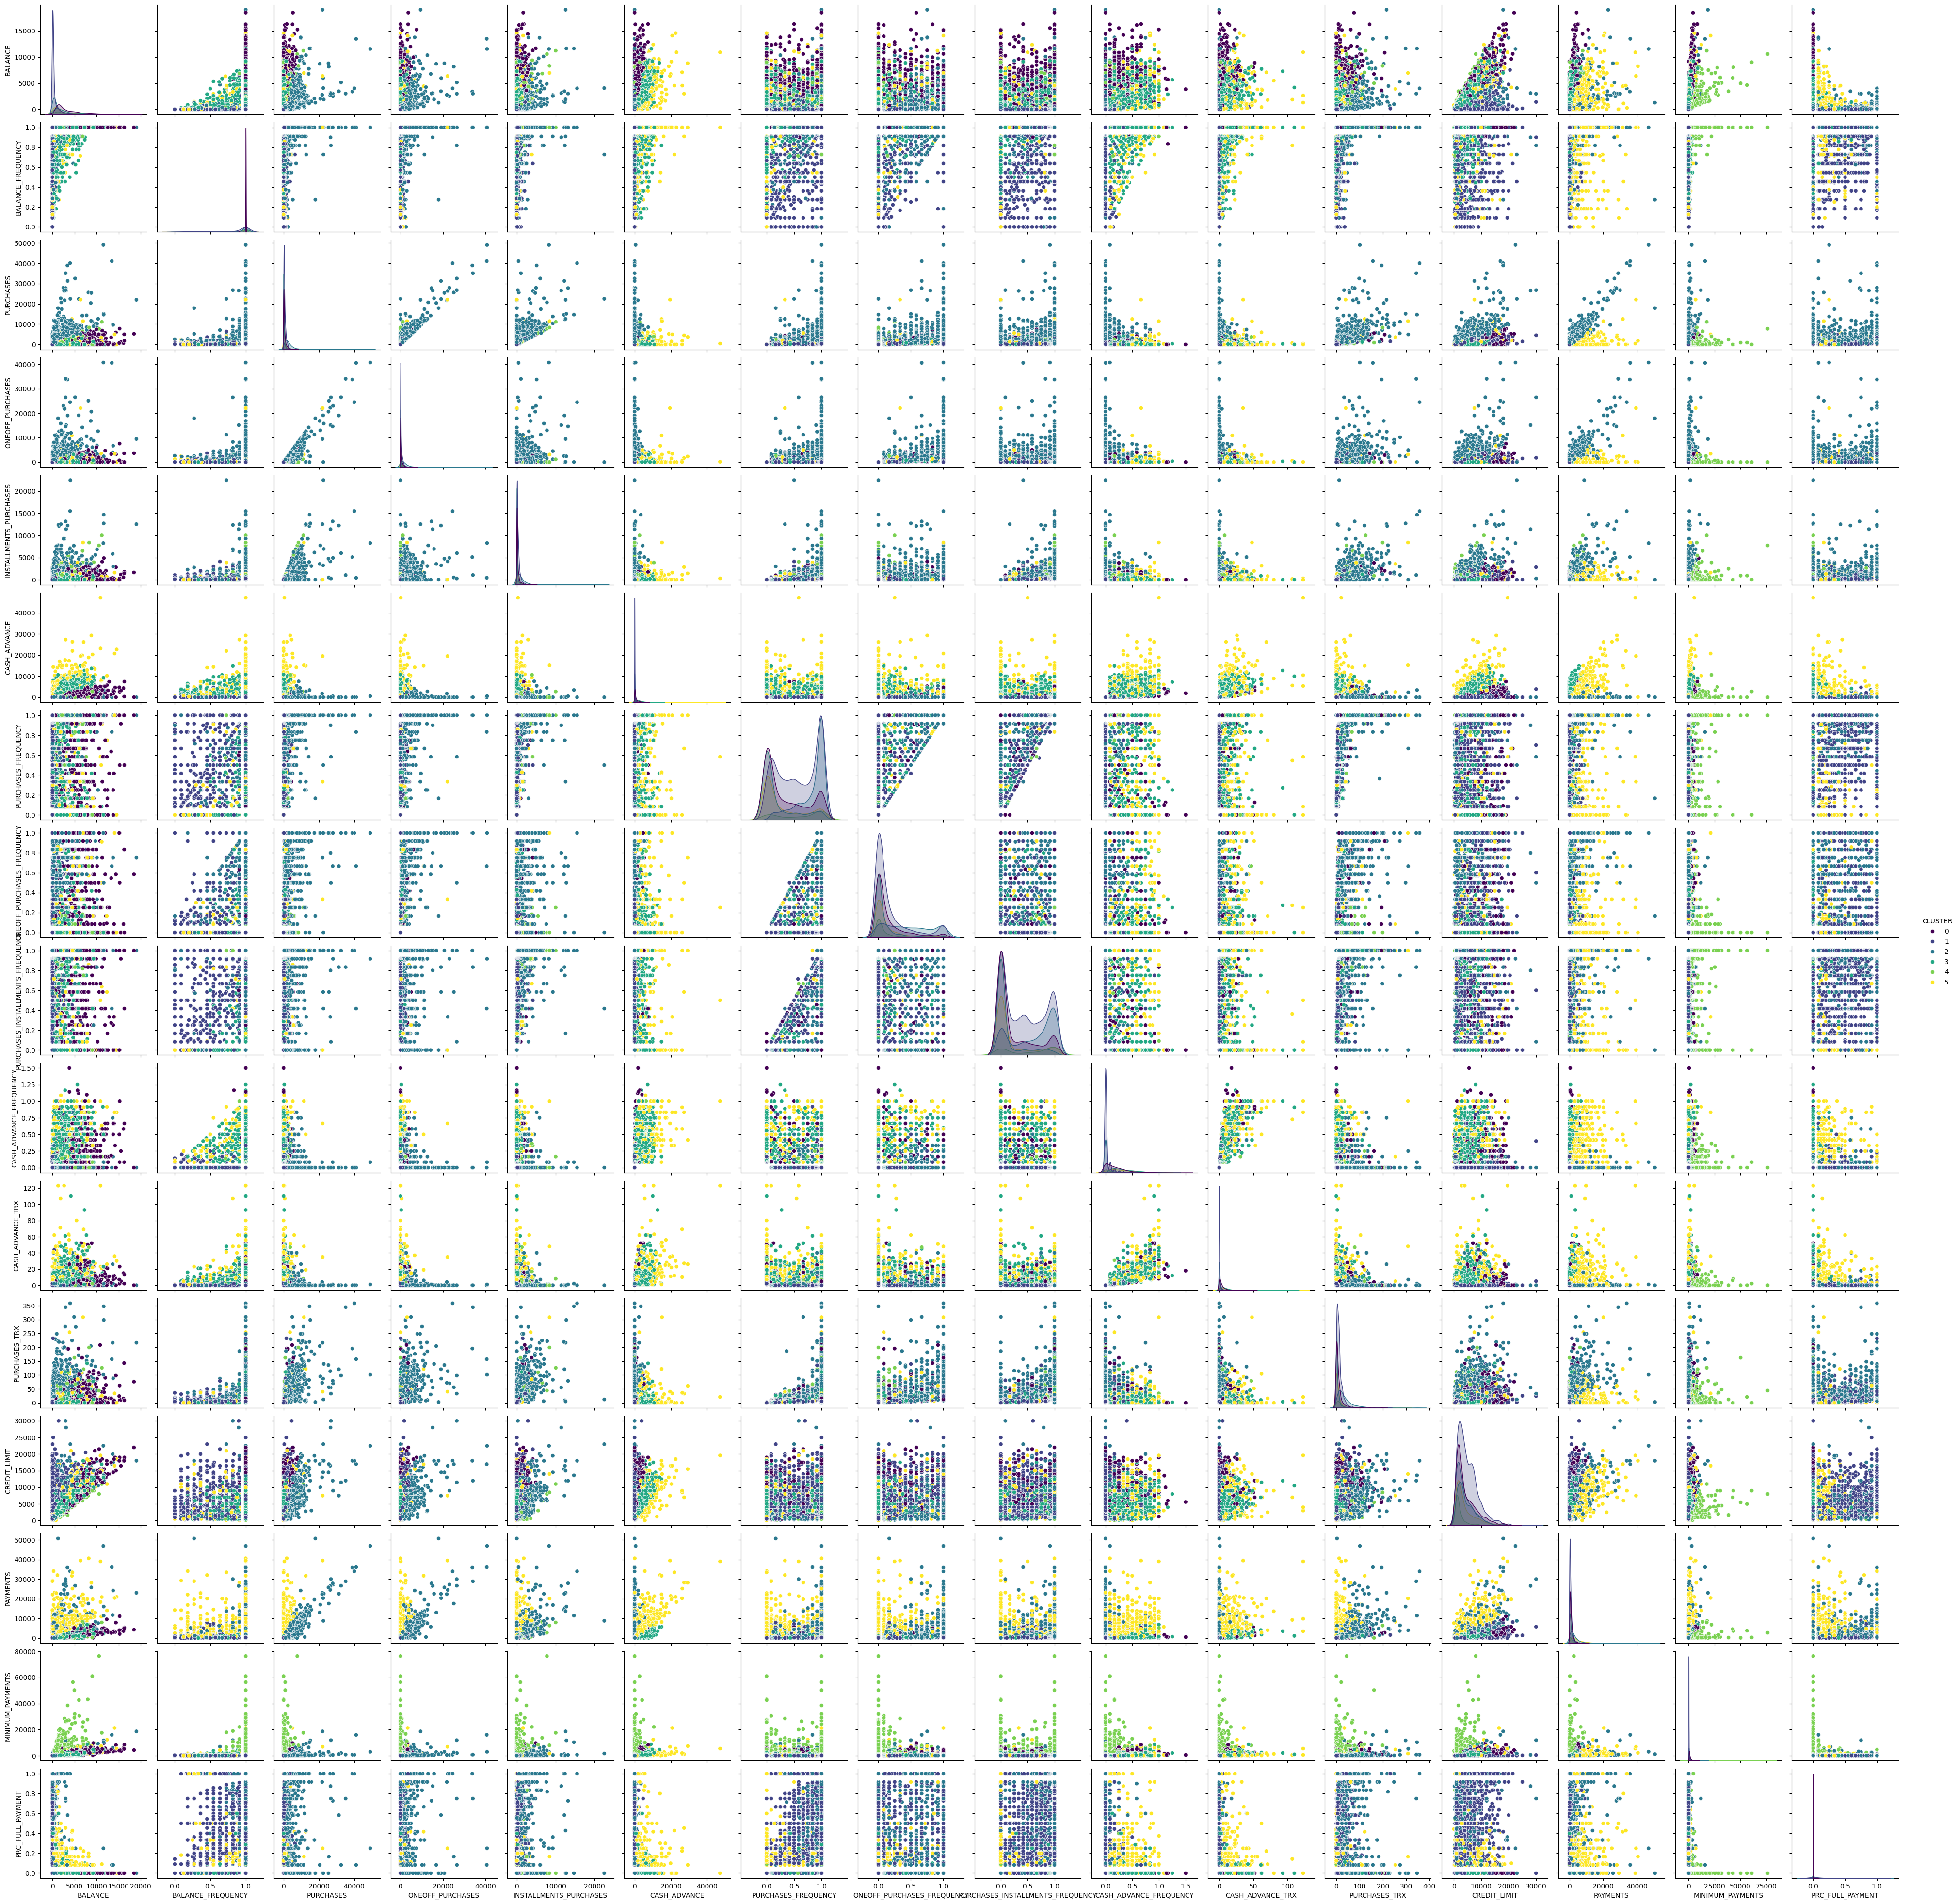

In [31]:
import seaborn as sns
sns.pairplot(dataset[0:],hue='CLUSTER',palette='viridis')

# 6. Entendiendo los valores de los atributos en los *clusters*

In [33]:
dataset.groupby('CLUSTER').describe()

BALANCE                                                     \
          count         mean          std         min          25%   
CLUSTER                                                              
0        1799.0  3245.877310  2628.199552  114.523682  1359.163038   
1        3205.0   418.106199   797.128793    0.000000    22.879526   
2        1487.0  1118.416028  1648.962974    0.000000   208.867070   
3        1138.0  2424.756155  2033.102621    1.691842   940.845868   
4         342.0  1959.062058  1816.549846   70.794108  1010.501276   
5         979.0  1767.343917  2002.934061    0.000000   498.274313   

                                                BALANCE_FREQUENCY            \
                 50%          75%           max             count      mean   
CLUSTER                                                                       
0        2271.102591  4492.351320  18495.558550            1799.0  0.998538   
1          79.432369   382.159579   7533.854422            3205.0  0.774363   
2         541.240795  1357.885439  19043.138560            1487.0  0.929561   
3        1842.398535  3300.653562  11581.933500            1138.0  0.891552   
4        1301.788287  2150.506925  11209.370760             342.0  0.987365   
5        1064.473728  2268.675458  14581.459140             979.0  0.856842   

         ... MINIMUM_PAYMENTS               PRC_FULL_PAYMENT            \
         ...              75%           max            count      mean   
CLUSTER  ...                                                             
0        ...      1461.096458   9642.502512           1799.0  0.000097   
1        ...       239.059144   3933.230932           3205.0  0.252482   
2        ...       500.419877  18621.013310           1487.0  0.284099   
3        ...      1026.625366   8644.138069           1138.0  0.008908   
4        ...      8172.035927  76406.207520            342.0  0.022729   
5        ...       891.640865  21235.065300            979.0  0.128703   

                                                           
              std  min  25%       50%       75%       max  
CLUSTER                                                    
0        0.002907  0.0  0.0  0.000000  0.000000  0.090909  
1        0.348776  0.0  0.0  0.000000  0.454545  1.000000  
2        0.369403  0.0  0.0  0.083333  0.571429  1.000000  
3        0.044482  0.0  0.0  0.000000  0.000000  0.600000  
4        0.099126  0.0  0.0  0.000000  0.000000  1.000000  
5        0.197516  0.0  0.0  0.083333  0.166667  1.000000  

[6 rows x 128 columns]

In [40]:
k_means.cluster_centers_

array([[5.61948730e-01, 3.00065508e-04, 8.32301257e-02, 4.71443751e-02,
        3.61235384e-02, 1.05737228e-01, 8.67079753e-05, 3.31389652e-05,
        5.99869503e-05, 4.31894954e-05, 7.57363725e-04, 1.83798734e-03,
        7.20623986e-01, 1.90879401e-01, 2.10436616e-01, 1.15759155e-07],
       [6.52597165e-02, 2.31565049e-04, 1.22156383e-01, 4.79002794e-02,
        7.43586461e-02, 1.97598422e-02, 1.74855100e-04, 3.38138777e-05,
        1.41960552e-04, 7.36161448e-06, 1.15252478e-04, 2.89071391e-03,
        9.45353730e-01, 1.54950490e-01, 5.58464271e-02, 7.79151378e-05],
       [1.54599773e-01, 2.44425945e-04, 4.43775262e-01, 2.60489090e-01,
        1.83463680e-01, 2.62547411e-02, 2.04881464e-04, 8.97966293e-05,
        1.50826491e-04, 9.46179230e-06, 1.73760012e-04, 6.18914156e-03,
        6.03086417e-01, 4.00606243e-01, 8.39467783e-02, 7.31329629e-05],
       [3.70338745e-01, 2.30822307e-04, 4.12556566e-02, 2.38684139e-02,
        1.73919635e-02, 5.02023360e-01, 4.77866510e-05, 1.626

In [41]:
dataset.drop(columns='CLUSTER',inplace=True)
centroids =pd.DataFrame(k_means.cluster_centers_,columns=dataset.columns)
round(centroids.var(),3).sort_values(ascending=False)

MINIMUM_PAYMENTS                    0.065
CREDIT_LIMIT                        0.042
CASH_ADVANCE                        0.041
PAYMENTS                            0.036
BALANCE                             0.030
PURCHASES                           0.022
ONEOFF_PURCHASES                    0.008
INSTALLMENTS_PURCHASES              0.004
ONEOFF_PURCHASES_FREQUENCY          0.000
PURCHASES_FREQUENCY                 0.000
BALANCE_FREQUENCY                   0.000
PURCHASES_INSTALLMENTS_FREQUENCY    0.000
PURCHASES_TRX                       0.000
CASH_ADVANCE_TRX                    0.000
CASH_ADVANCE_FREQUENCY              0.000
PRC_FULL_PAYMENT                    0.000
dtype: float64

In [47]:
description=round(dataset.groupby('CLUSTER')[['PURCHASES', 'BALANCE', 'CASH_ADVANCE', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS']].describe())

In [48]:
description['N_CUSTOMERS']=dataset.CLUSTER.value_counts()
description

PURCHASES                                                          \
            count    mean     std    min     25%     50%     75%      max   
CLUSTER                                                                     
0          1799.0   519.0   945.0    0.0     0.0   143.0   585.0   7824.0   
1          3205.0   629.0   753.0    0.0   135.0   365.0   833.0   6408.0   
2          1487.0  3328.0  4125.0  101.0  1179.0  2186.0  3911.0  49040.0   
3          1138.0   239.0   477.0    0.0     0.0     0.0   298.0   4086.0   
4           342.0   856.0  1277.0    0.0   108.0   480.0  1053.0  11147.0   
5           979.0   528.0  1250.0    0.0     0.0    71.0   571.0  22102.0   

        BALANCE          ... PAYMENTS MINIMUM_PAYMENTS                         \
          count    mean  ...      max            count    mean     std    min   
CLUSTER                  ...                                                    
0        1799.0  3246.0  ...  11123.0           1799.0  1150.0  1030.0  152.0   
1        3205.0   418.0  ...   8946.0           3205.0   221.0   211.0    0.0   
2        1487.0  1118.0  ...  50721.0           1487.0   538.0  1120.0   14.0   
3        1138.0  2425.0  ...   7964.0           1138.0   796.0   758.0    9.0   
4         342.0  1959.0  ...   8736.0            342.0  6865.0  9204.0  253.0   
5         979.0  1767.0  ...  40628.0            979.0   747.0  1144.0    1.0   

                                         N_CUSTOMERS  
            25%     50%     75%      max              
CLUSTER                                               
0         463.0   814.0  1461.0   9643.0        1799  
1         119.0   171.0   239.0   3933.0        3205  
2         168.0   215.0   500.0  18621.0        1487  
3         312.0   546.0  1027.0   8644.0        1138  
4        1865.0  3410.0  8172.0  76406.0         342  
5         222.0   448.0   892.0  21235.0         979  

[6 rows x 49 columns]

# 7. Interpretando los *clusters*